# Kelly Criterion  

https://www.investopedia.com/terms/k/kellycriterion.asp

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [226]:
import seaborn as sns
import pandas as pd
import functools
import matplotlib.ticker as ticker

In [13]:
def game(wager, odds=0.5, payout=1.0):
    if rand() < odds:
        return payout * wager
    else:
        return -wager

In [22]:
def play(wager, odds=0.5, payout=1.0, bankroll=100, count=10, game=game, wager_rate=None):
    for j in range(count):
        if bankroll <= 0:
            return 0
        if wager_rate is not None:
            wager = wager_rate * bankroll
        bankroll += game(wager=min(bankroll, wager), payout=payout, odds=odds)
    return bankroll

In [109]:
def sim(wager, odds=0.5, payout=1.0, iterations=1000, bankroll=100, count=10, game=game, wager_rate=None):
    return array([play(wager, payout=payout, odds=odds, bankroll=bankroll, count=count, game=game, wager_rate=wager_rate) for j in range(iterations)])

In [138]:
def sim(wager, odds=0.5, payout=1.0, iterations=1000, bankroll=100, count=10, game=game, wager_rate=None):
    return array([(wager_rate, play(wager, payout=payout, odds=odds, bankroll=bankroll, count=count, game=game, wager_rate=wager_rate)) for j in range(iterations)])

In [230]:
wagers = linspace(0,1,101)
player = lambda a, w: pd.concat([a, pd.DataFrame(data = sim(wager=None, wager_rate=w, odds=.50, payout=5, iterations=1000, count=10), columns=['wager_rate', 'payout'])], ignore_index=True)
df = functools.reduce(player, wagers, pd.DataFrame(columns=['wager_rate', 'payout']))

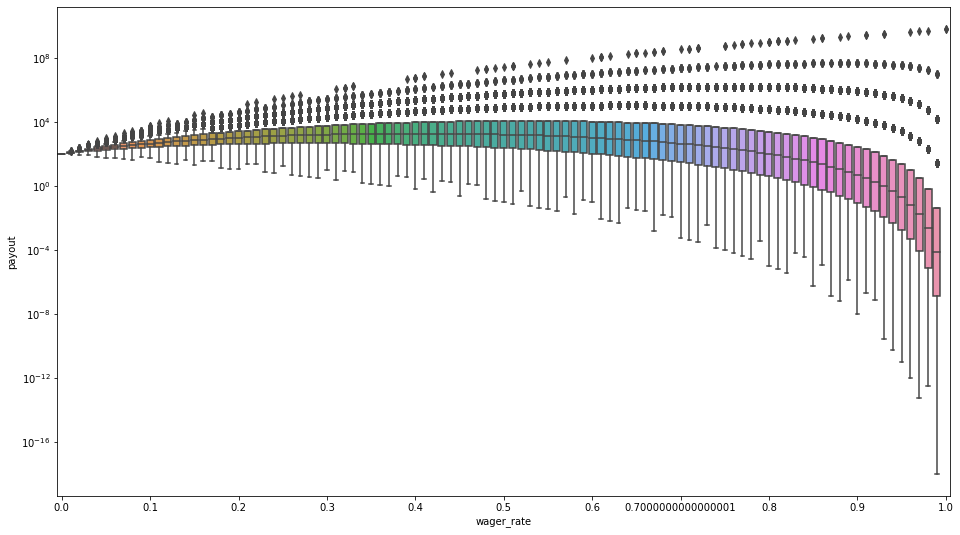

In [231]:
plt.figure(figsize=(16,9))
g = sns.boxplot(x='wager_rate', y='payout', data=df)
g.set_yscale("log")
g.xaxis.set_major_locator(ticker.MultipleLocator(10))

<AxesSubplot:xlabel='wager_rate', ylabel='payout'>

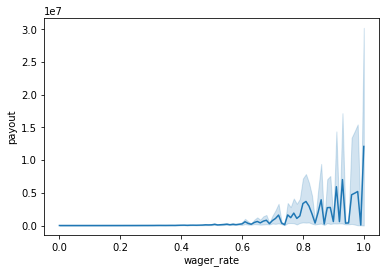

In [232]:
sns.lineplot(x='wager_rate', y='payout', data=df)

<AxesSubplot:xlabel='wager_rate'>

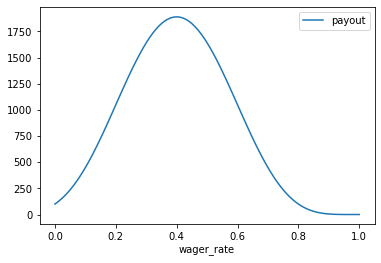

In [233]:
sns.lineplot(data=df.groupby('wager_rate').median())